# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

<hr>

## Download dos conjuntos de dados em formato .csv

In [1]:
import pandas as pd
from lightgbm import LGBMClassifier

In [2]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'dataset/training_dataset.csv')
df_training_dataset.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [3]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [4]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

## Pre-processando o dataset antes do treinamento

### Removendo todas as linhas que possuem algum valor nulos em determinadas colunas

Usando o método Pandas **DataFrame.dropna()** você pode remover todas as linhas nulas do dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [5]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64



In [8]:
# Aplicando a função para deletar todas as linhas com valor NaN na coluna ``certificados'' e ``total_modulos'':
#df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

In [6]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64



### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [8]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

id                            0
graduacao                     0
universidade                  0
profissao                     0
organizacao                   0
pretende_fazer_cursos_lit     0
interesse_mba_lit             0
importante_ter_certificado    0
horas_semanais_estudo         0
como_conheceu_lit    

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [9]:
df_training_dataset_imputed.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,0,10.0,0.0,0.0,0.0,perfil6
15853,229931283.0,Bacharelado,0,Advogado,0,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,0.0,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,0,0.0,0.0,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,0,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,0,FGV-RJ,0,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


In [41]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['id'], inplace=False)

In [42]:
df_training_dataset_rmcolumns.tail()

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,0,10.0,0.0,0.0,0.0,perfil6
15853,Bacharelado,0,Advogado,0,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,0.0,perfil5
15854,Tecnólogo,UNIP,Sócio/Dono/Proprietário,0,0.0,0.0,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,0,226.0,102.0,93.0,1.0,perfil1
15856,0,FGV-RJ,0,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [43]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['profissao'])
# df_training.tail()
df_training = df_training_dataset_rmcolumns.copy()

# Atenção!

A coluna **categoria** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [44]:
df_training.columns

Index(['graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados', 'categoria'],
      dtype='object')

In [45]:
features = df_training[
    [
        'graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'
    ]
]
target = df_training['categoria']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [68]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

features["graduacao"] = np.where(features["graduacao"]==0, "missing",features["graduacao"])
features["profissao"] = np.where(features["profissao"]==0, "missing",features["profissao"])
features["organizacao"] = np.where(features["organizacao"]==0, "missing",features["organizacao"])
features["universidade"] = np.where(features["universidade"]==0, "missing",features["universidade"])
features["como_conheceu_lit"] = np.where(features["como_conheceu_lit"]==0, "missing",features["como_conheceu_lit"])

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

smc = SMOTENC(categorical_features=[0, 1, 2, 3, 8], random_state=143)

X_train, y_train = smc.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

### Treinando uma árvore de decisão

In [69]:
# Método para creacion de modelos basados en arbol de desición
# from sklearn.tree import DecisionTreeClassifier
X_train["profissao"] = X_train["profissao"].astype("category")
X_train["graduacao"] = X_train["graduacao"].astype("category")
X_train["organizacao"] = X_train["organizacao"].astype("category")
X_train["universidade"] = X_train["universidade"].astype("category")
X_train["como_conheceu_lit"] = X_train["como_conheceu_lit"].astype("category")

In [70]:
X_train.dtypes

graduacao                     category
universidade                  category
profissao                     category
organizacao                   category
pretende_fazer_cursos_lit      float64
interesse_mba_lit              float64
importante_ter_certificado     float64
horas_semanais_estudo          float64
como_conheceu_lit             category
total_modulos                  float64
modulos_iniciados              float64
modulos_finalizados            float64
certificados                   float64
dtype: object

In [71]:
dtc = LGBMClassifier(objective="multiclass", learning_rate=0.001, n_estimators=10000)
dtc.fit(X_train, y_train, categorical_feature=["profissao", "graduacao", "como_conheceu_lit", "universidade", "organizacao"])

/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['como_conheceu_lit', 'graduacao', 'organizacao', 'profissao', 'universidade']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


LGBMClassifier(learning_rate=0.001, n_estimators=10000, objective='multiclass')

### Fazendo previsões na amostra de teste

In [72]:
X_test["profissao"] = X_test["profissao"].astype("category")
X_test["graduacao"] = X_test["graduacao"].astype("category")
X_test["organizacao"] = X_test["organizacao"].astype("category")
X_test["universidade"] = X_test["universidade"].astype("category")
X_test["como_conheceu_lit"] = X_test["como_conheceu_lit"].astype("category")

y_pred = dtc.predict(X_test)
print(y_pred)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

['perfil2' 'perfil2' 'perfil4' ... 'perfil1' 'perfil2' 'perfil1']


### Analisando a qualidade do modelo através da matriz de confusão

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

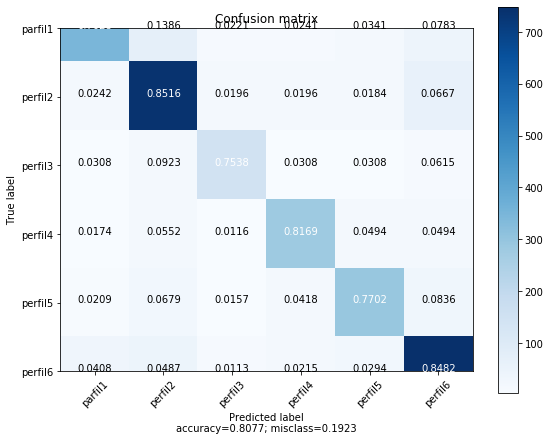

In [74]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [75]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'dataset/to_be_scored.csv')
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [76]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [84]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['id'], inplace=False)

# 4 - Encoding com "dummy variables"
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['profissao'])
df_to_be_scored_4 = df_to_be_scored_3.copy()

df_to_be_scored_4["graduacao"] = np.where(df_to_be_scored_4["graduacao"]==0, "missing",df_to_be_scored_4["graduacao"])
df_to_be_scored_4["profissao"] = np.where(df_to_be_scored_4["profissao"]==0, "missing",df_to_be_scored_4["profissao"])
df_to_be_scored_4["organizacao"] = np.where(df_to_be_scored_4["organizacao"]==0, "missing",df_to_be_scored_4["organizacao"])
df_to_be_scored_4["universidade"] = np.where(df_to_be_scored_4["universidade"]==0, "missing",df_to_be_scored_4["universidade"])
df_to_be_scored_4["como_conheceu_lit"] = np.where(df_to_be_scored_4["como_conheceu_lit"]==0, "missing",df_to_be_scored_4["como_conheceu_lit"])

df_to_be_scored_4["profissao"] = df_to_be_scored_4["profissao"].astype("category")
df_to_be_scored_4["graduacao"] = df_to_be_scored_4["graduacao"].astype("category")
df_to_be_scored_4["organizacao"] = df_to_be_scored_4["organizacao"].astype("category")
df_to_be_scored_4["universidade"] = df_to_be_scored_4["universidade"].astype("category")
df_to_be_scored_4["como_conheceu_lit"] = df_to_be_scored_4["como_conheceu_lit"].astype("category")

df_to_be_scored_4.tail()

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [85]:
df_training[
    [
        'graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'
    ]
].columns

Index(['graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'],
      dtype='object')

In [86]:
df_to_be_scored_4.columns

Index(['graduacao', 'universidade', 'profissao', 'organizacao',
       'pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo',
       'como_conheceu_lit', 'total_modulos', 'modulos_iniciados',
       'modulos_finalizados', 'certificados'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
#df_to_be_scored_4['profissao_0'] = 0

In [87]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['target'] = y_pred
df_to_be_scored_4.tail()

,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,target
995,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1,perfil1
996,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0,perfil2
997,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0,perfil6
998,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0,perfil2
999,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [88]:
#project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))
df_to_be_scored_4.to_csv("results.csv", index=False)

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
